In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [22]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(len(train))
print(len(train.columns))
print(type(train))

train.head()

26729
10
<class 'pandas.core.frame.DataFrame'>


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [23]:
print(train.describe())
#print(train.columns)
#train.info()

       AnimalID   Name             DateTime OutcomeType OutcomeSubtype  \
count     26729  19038                26729       26729          13117   
unique    26729   6374                22918           5             16   
top     A674190    Max  2015-08-11 00:00:00    Adoption        Partner   
freq          1    136                   19       10769           7816   

       AnimalType SexuponOutcome AgeuponOutcome                   Breed  \
count       26729          26728          26711                   26729   
unique          2              5             44                    1380   
top           Dog  Neutered Male         1 year  Domestic Shorthair Mix   
freq        15595           9779           3969                    8810   

              Color  
count         26729  
unique          366  
top     Black/White  
freq           2824  


In [24]:
columns = train.columns
for column in columns:
    print(column)
    print(train[column].nunique())

AnimalID
26729
Name
6374
DateTime
22918
OutcomeType
5
OutcomeSubtype
16
AnimalType
2
SexuponOutcome
5
AgeuponOutcome
44
Breed
1380
Color
366


In [25]:
#train["Name"]
#train['OutcomeType'].value_counts()
#train.iloc[:,1].value_counts()

# frequency of each unique value counts
s = pd.Series(train.columns)
for i in range(0,len(s)):
    p = pd.DataFrame(train.iloc[:,i].value_counts())
#    print(p)

In [26]:
#train.iloc[:,1].isna().count()
#train.iloc[:,1].isna()
train.isna().sum()

AnimalID              0
Name               7691
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
dtype: int64

In [27]:
train['OutcomeType'].value_counts()

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64

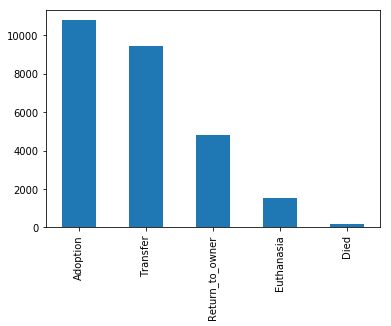

In [28]:
#Visualizing frequency of each values from Target variable
train['OutcomeType'].value_counts().plot.bar()

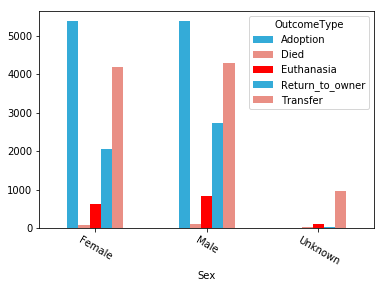

In [29]:
M_F = {'Neutered Male':'Male','Spayed Female':'Female','Intact Male':'Male','Intact Female':'Female','Unknown':'Unknown'}
animals = train
animals['Sex'] = animals.SexuponOutcome.map(M_F)
Sex = pd.DataFrame(train.Sex.value_counts())
df = pd.DataFrame(train[['Sex','OutcomeType']])
#df.plot(kind='bar')
OutcomeSex = df.groupby(['Sex','OutcomeType']).size().unstack()
OutcomeSex.plot(kind='bar',color=['#34ABD8','#E98F85','r'],rot=-30)

Dog    15595
Cat    11134
Name: AnimalType, dtype: int64


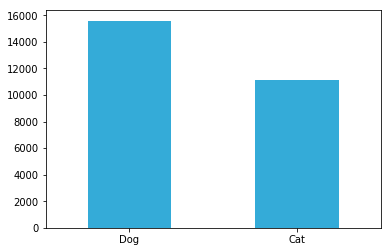

In [30]:
AnimalType = train['AnimalType'].value_counts()
print(AnimalType)
AnimalType.plot(kind='bar',color='#34ABD8',rot=0)

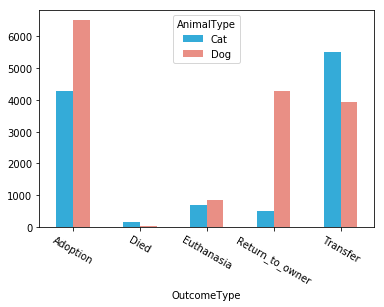

In [31]:
AnimalType = train[['AnimalType','OutcomeType']].groupby(['OutcomeType','AnimalType']).size().unstack()
AnimalType.plot(kind='bar',color=['#34ABD8','#E98F85'],rot=-30)

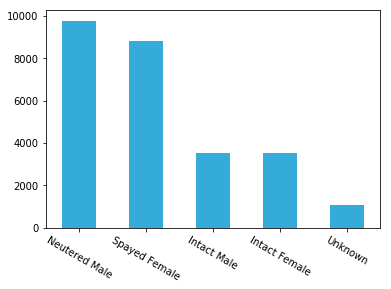

In [32]:
SexuponOutcome = train['SexuponOutcome'].value_counts()
SexuponOutcome.plot(kind='bar',color=['#34ABD8'],rot=-30)

In [13]:
print("### Missing values in Percentage to its column ###")
print(train.apply(lambda x: sum(x.isnull()/len(train))))
print("### Missing values in counts ###")
print(train.apply(lambda x: sum(x.isnull())))

### Missing values in Percentage to its column ###
AnimalID          0.000000
Name              0.287740
DateTime          0.000000
OutcomeType       0.000000
OutcomeSubtype    0.509260
AnimalType        0.000000
SexuponOutcome    0.000037
AgeuponOutcome    0.000673
Breed             0.000000
Color             0.000000
Sex               0.000037
dtype: float64
### Missing values in counts ###
AnimalID              0
Name               7691
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
Sex                   1
dtype: int64


In [33]:
train.dtypes

AnimalID          object
Name              object
DateTime          object
OutcomeType       object
OutcomeSubtype    object
AnimalType        object
SexuponOutcome    object
AgeuponOutcome    object
Breed             object
Color             object
Sex               object
dtype: object

In [34]:
train['Name']=train[['Name']].fillna(value = 0)
train['has_name']=(train['Name']!= 0).astype('int64')
train = train.drop('Name', axis=1)

In [35]:
# created a column 'has_name'
train["has_name"]

0        1
1        1
2        1
3        0
4        0
5        1
6        1
7        0
8        1
9        0
10       0
11       0
12       1
13       1
14       1
15       1
16       0
17       0
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
26699    1
26700    1
26701    1
26702    0
26703    1
26704    1
26705    1
26706    1
26707    0
26708    1
26709    0
26710    1
26711    1
26712    1
26713    0
26714    1
26715    1
26716    1
26717    1
26718    0
26719    0
26720    1
26721    1
26722    0
26723    1
26724    0
26725    0
26726    1
26727    0
26728    0
Name: has_name, Length: 26729, dtype: int64

In [36]:
#counting NA in each column
train = train.apply(lambda x:x.fillna(x.value_counts().index[0]))
train.apply(lambda x: sum(x.isnull()/len(train)))
#train.isna().sum()


AnimalID          0.0
DateTime          0.0
OutcomeType       0.0
OutcomeSubtype    0.0
AnimalType        0.0
SexuponOutcome    0.0
AgeuponOutcome    0.0
Breed             0.0
Color             0.0
Sex               0.0
has_name          0.0
dtype: float64

In [37]:
train

,AnimalID,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Sex,has_name
0,A671945,2014-02-12 18:22:00,Return_to_owner,Partner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,Male,1
1,A656520,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,Female,1
2,A686464,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,Male,1
3,A683430,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,Male,0
4,A667013,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,Male,0
5,A677334,2014-04-25 13:04:00,Transfer,Partner,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan,Female,1
6,A699218,2015-03-28 13:11:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby,Male,1
7,A701489,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby,Unknown,0
8,A671784,2014-02-04 17:17:00,Adoption,Partner,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White,Female,1
9,A677747,2014-05-03 07:48:00,Adoption,Offsite,Dog,Spayed Female,1 year,Cairn Terrier,White,Female,0


In [38]:
print(type(train))
print(train.shape)

<class 'pandas.core.frame.DataFrame'>
(26729, 11)


In [39]:
# there is no NaN in the Dataset
#train

In [40]:
train = train.drop('AnimalID', axis=1)
train.shape

(26729, 10)

In [41]:
# creating new column 'top_colors'
color_counts = train['Color'].value_counts()
color_others = set(color_counts[color_counts < 300].index)
train['top_colors'] = train['Color'].replace(list(color_others), 'Others')
print(train['top_colors'].nunique())

28


In [42]:
#colors with frequencies of lessthan 300, hence they are replaced with "others"
#color_others

In [43]:
#colours with the frequency of more than 300
c = train['top_colors'].unique()
for i in c:
    print(i)

Brown/White
Others
Blue/White
Tan
Black/Tan
Blue Tabby
Brown Tabby
Red/White
White
Black
Brown
Orange Tabby/White
Black/White
Brown Brindle/White
Black/Brown
Orange Tabby
White/Tan
Blue
Calico
Torbie
Brown/Black
Tricolor
White/Black
Tortie
Tan/White
Brown Tabby/White
Red
White/Brown


In [44]:
# Breed column before. in the next cell its gonna under-go through some changes
#train.Breed

In [45]:
# created new column 'breed_type'
#to change the values of the 'Breed' column into 'Mix' or 'Pure'
import re
train['breed_type'] = train.Breed.str.extract('({})'.format('|'.join(['Mix'])), flags=re.IGNORECASE,
                                              expand=False).str.lower().fillna('pure')

In [46]:
train['breed_type'].head()

0     mix
1     mix
2     mix
3     mix
4    pure
Name: breed_type, dtype: object

In [47]:
#creating a new column to state that whether the animal is multi-colored or not
train['multi_colors'] = train['Color'].apply(lambda x : 1 if '/' in x else 0)
#train['multi_colors']

In [48]:
# regularizing periods (Age of the animal into days).
def age_converter(row):
    age_string = row['AgeuponOutcome']
    [age,unit] = age_string.split(" ")
    unit = unit.lower()
    if("day" in unit):
        if age=='0': return 1
        return int(age)
    if("week" in unit):
        if(age)=='0': return 7
        return int(age)*7
    if("month" in unit):
        if(age)=='0': return 30
        return int(age) * 4*7
    elif("year" in unit):
        if(age)=='0': return 365
        return int(age) * 4*12*7
train['age_numeric'] = train.apply(age_converter, axis=1)
train = train.drop('AgeuponOutcome', axis=1)

In [49]:
# created a column for age_numeric
train['age_numeric'].head()

0    336
1    336
2    672
3     21
4    672
Name: age_numeric, dtype: int64

In [50]:
# Dropping few columns
train = train.drop(['Breed','Color','DateTime'], axis=1)

In [51]:
# distingishing Numerical & Categorical features
numeric_features = train.select_dtypes(include=['int64', 'float64']).columns
print(numeric_features)
categorical_features = train.select_dtypes(include=['object']).drop(['OutcomeType'], axis=1).columns
print(categorical_features)

Index(['has_name', 'multi_colors', 'age_numeric'], dtype='object')
Index(['OutcomeSubtype', 'AnimalType', 'SexuponOutcome', 'Sex', 'top_colors',
       'breed_type'],
      dtype='object')


In [33]:
# using pandas get_dummies (OHE) to convert all categorical variable.
dummy_columns = pd.get_dummies(train[categorical_features])

In [34]:
# concat dummy_columns and train
# dropping 'AnimalType', 'breed_type','SexuponOutcome', 'top_colors'.
final_train = pd.concat([dummy_columns, train],axis=1)
final_train = final_train.drop(['AnimalType', 'breed_type', 'SexuponOutcome', 'top_colors', 'OutcomeSubtype'], axis=1)

In [35]:
# Splitting dataset
X = final_train.drop('OutcomeType', axis=1)
y = final_train['OutcomeType']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [36]:
# using simple RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss

clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                            random_state=0)
rf_model = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
y_prob = rf_model.predict_proba(X_test)
print(log_loss(y_test, y_prob))

ValueError: could not convert string to float: 'Male'

In [37]:
# lets improve the accuracy by feature selection
features = X.columns
importances = rf_model.feature_importances_ # doubt in the syntax
indices = np.argsort(importances)
plt.figure(figsize = (10,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='G', align = 'center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show

NameError: name 'rf_model' is not defined

In [38]:
cols = final_train.columns
for col in cols:
#    print(col)

SyntaxError: unexpected EOF while parsing (<ipython-input-38-e333c49ff34c>, line 3)

In [39]:
new_train = final_train[['has_name','age_numeric','SexuponOutcome_Intact Female','SexuponOutcome_Intact Male',
'SexuponOutcome_Spayed Female','AnimalType_Dog','SexuponOutcome_Neutered Male','AnimalType_Cat','OutcomeType','SexuponOutcome_Unknown']]

In [40]:
# Splitting dataset
X = new_train.drop('OutcomeType', axis=1)
y = new_train['OutcomeType']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [41]:
# using simple RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss

clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                            random_state=0)
rf_model = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
y_prob = rf_model.predict_proba(X_test)
print(log_loss(y_test, y_prob))

0.5914702581369248
1.0351655141730811


In [42]:
###################################

In [43]:
nw_train = pd.read_csv('train.csv')
#nw_train.info()
nw_train.isna().sum()

AnimalID              0
Name               7691
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
dtype: int64

In [44]:
n_train = nw_train[['Name','AgeuponOutcome','SexuponOutcome','AnimalType','Breed','Color','OutcomeType','DateTime','OutcomeSubtype']]

In [45]:
#n_train['OutcomeSubtype'].value_counts()

In [46]:
#n_train['DateTime'].value_counts()

In [47]:
n_train['Name']=n_train[['Name']].fillna(value = 0)
n_train['has_name']=(n_train['Name']!= 0).astype('int64')
n_train = n_train.drop('Name', axis=1)

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
#counting NA in each column after filling na
n_train = n_train.apply(lambda x:x.fillna(x.value_counts().index[0]))
n_train.apply(lambda x: sum(x.isnull()/len(n_train)))

AgeuponOutcome    0.0
SexuponOutcome    0.0
AnimalType        0.0
Breed             0.0
Color             0.0
OutcomeType       0.0
DateTime          0.0
OutcomeSubtype    0.0
has_name          0.0
dtype: float64

In [49]:
# regularizing periods (Age of the animal into days).
def age_converter(row):
    age_string = row['AgeuponOutcome']
    [age,unit] = age_string.split(" ")
    unit = unit.lower()
    if("day" in unit):
        if age=='0': return 1
        return int(age)
    if("week" in unit):
        if(age)=='0': return 7
        return int(age)*7
    if("month" in unit):
        if(age)=='0': return 30
        return int(age) * 4*7
    elif("year" in unit):
        if(age)=='0': return 365
        return int(age) * 4*12*7
n_train['age_numeric'] = n_train.apply(age_converter, axis=1)
n_train = n_train.drop('AgeuponOutcome', axis=1)

In [50]:
cols = n_train.columns
for col in cols:
    print(col)

SexuponOutcome
AnimalType
Breed
Color
OutcomeType
DateTime
OutcomeSubtype
has_name
age_numeric


In [51]:
num_features = n_train.select_dtypes(include=['int64', 'float64']).columns
print(numeric_features)
cate_features = n_train.select_dtypes(include=['object']).drop(['OutcomeType'], axis=1).columns
print(categorical_features)

Index(['has_name', 'multi_colors', 'age_numeric'], dtype='object')
Index(['OutcomeSubtype', 'AnimalType', 'SexuponOutcome', 'Sex', 'top_colors',
       'breed_type'],
      dtype='object')


In [52]:
dummy_cols = pd.get_dummies(n_train[cate_features])

In [53]:
finl_train = pd.concat([dummy_cols, n_train],axis=1)
finl_train = finl_train.drop(['AnimalType', 'Breed', 'SexuponOutcome', 'Color', 'OutcomeSubtype', 'DateTime'], axis=1)

In [54]:
# Splitting dataset
X = finl_train.drop('OutcomeType', axis=1)
y = finl_train['OutcomeType']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [66]:
# using simple RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss

clf = RandomForestClassifier(n_estimators=100, max_depth=75,
                            random_state=0) # what is the optimized max_depth?

rf_model = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
y_pred_train = clf.predict(X_test)
print(accuracy_score(y_train,y_pred_train))
y_prob = rf_model.predict_proba(X_test)
print(log_loss(y_test, y_prob))
print("Accuracy-Test:")

0.6950991395435839


ValueError: Found input variables with inconsistent numbers of samples: [21383, 5346]

In [69]:
y_pred = clf.predict(X_test)
print("Accuracy-Test")
print(accuracy_score(y_test,y_pred))

y_pred_train = clf.predict(X_train)
print("Accuracy-Train")
print(accuracy_score(y_train,y_pred_train))


Accuracy-Test
0.6950991395435839
Accuracy-Train
0.7502221390824487


In [59]:
print(X_train.shape)
print(y_train.shape)

(21383, 24689)
(21383,)


In [60]:
from sklearn.metrics import confusion_matrix
y_pred = rf_model.predict(X_train)
cm_trn = confusion_matrix(y_train, y_pred)
print("Confusion matrix-Training")
print(cm_trn)

Confusion matrix-Training
[[8447    0    0    3  153]
 [   7  138    0    1   13]
 [   0    0 1247    0    1]
 [2582    0    0 1100  188]
 [2386    0    0    7 5110]]


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

                 precision    recall  f1-score   support

       Adoption       0.63      0.98      0.77      8603
           Died       1.00      0.87      0.93       159
     Euthanasia       1.00      1.00      1.00      1248
Return_to_owner       0.99      0.28      0.44      3870
       Transfer       0.94      0.68      0.79      7503

      micro avg       0.75      0.75      0.75     21383
      macro avg       0.91      0.76      0.79     21383
   weighted avg       0.83      0.75      0.73     21383



In [64]:
from sklearn.metrics import confusion_matrix
y_pred_tst = rf_model.predict(X_test)
cm_tst = confusion_matrix(y_test, y_pred_tst)
print("Confusion matrix-Test")
print(cm_tst)

Confusion matrix-Test
[[2075    0    0   12   79]
 [   5   22    1    0   10]
 [   3    0  304    0    0]
 [ 736    0    0   87   93]
 [ 665    0    0   26 1228]]


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tst))

                 precision    recall  f1-score   support

       Adoption       0.60      0.96      0.73      2166
           Died       1.00      0.58      0.73        38
     Euthanasia       1.00      0.99      0.99       307
Return_to_owner       0.70      0.09      0.17       916
       Transfer       0.87      0.64      0.74      1919

      micro avg       0.70      0.70      0.70      5346
      macro avg       0.83      0.65      0.67      5346
   weighted avg       0.74      0.70      0.65      5346

